# Exam: Numerical Analysis for Machine Learning
## June 15, 2023

### Exercise 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('glass.data', names=['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### 1) Extract the samples of type class 1 and 7. How many samples belong to the 2 groups?

In [35]:
nums_to_classes = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}

classes_to_nums = {v: k for k, v in nums_to_classes.items()}

data_by_class = {k: data[data['Type'] == k] for k in nums_to_classes.keys()}

print(f'Class 1: {data_by_class[1].shape[0]} samples.')
print(f'Class 7: {data_by_class[7].shape[0]} samples.')

Class 1: 70 samples.
Class 7: 29 samples.


#### 2) Normalize the data so that each feature has zero mean and unitary std

In [36]:
A = data.drop(['Id', 'Type'], axis=1).values

A_norm = (A - A.mean(axis=0)) / A.std(axis=0)

print(f'Means: {A_norm.mean(axis=0)}')
print(f'Stds: {A_norm.std(axis=0)}')

Means: [-2.87703402e-14  2.19139348e-15 -1.32811726e-16 -2.98826384e-16
  9.52509100e-16  3.52781148e-17 -3.15427850e-16 -6.64058632e-17
 -3.73532980e-17]
Stds: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### 3) Perform PCA on the dataset by means of SVD decomposition. Then, plot the trend of the singular values $\sigma_k$, the cummulate fraction of singular values $\frac{\sum_{i=1}^k \sigma_i}{\sum_{i=1}^q \sigma_i}$, the fraction of the explained variance $\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^q \sigma_i^2}$ 

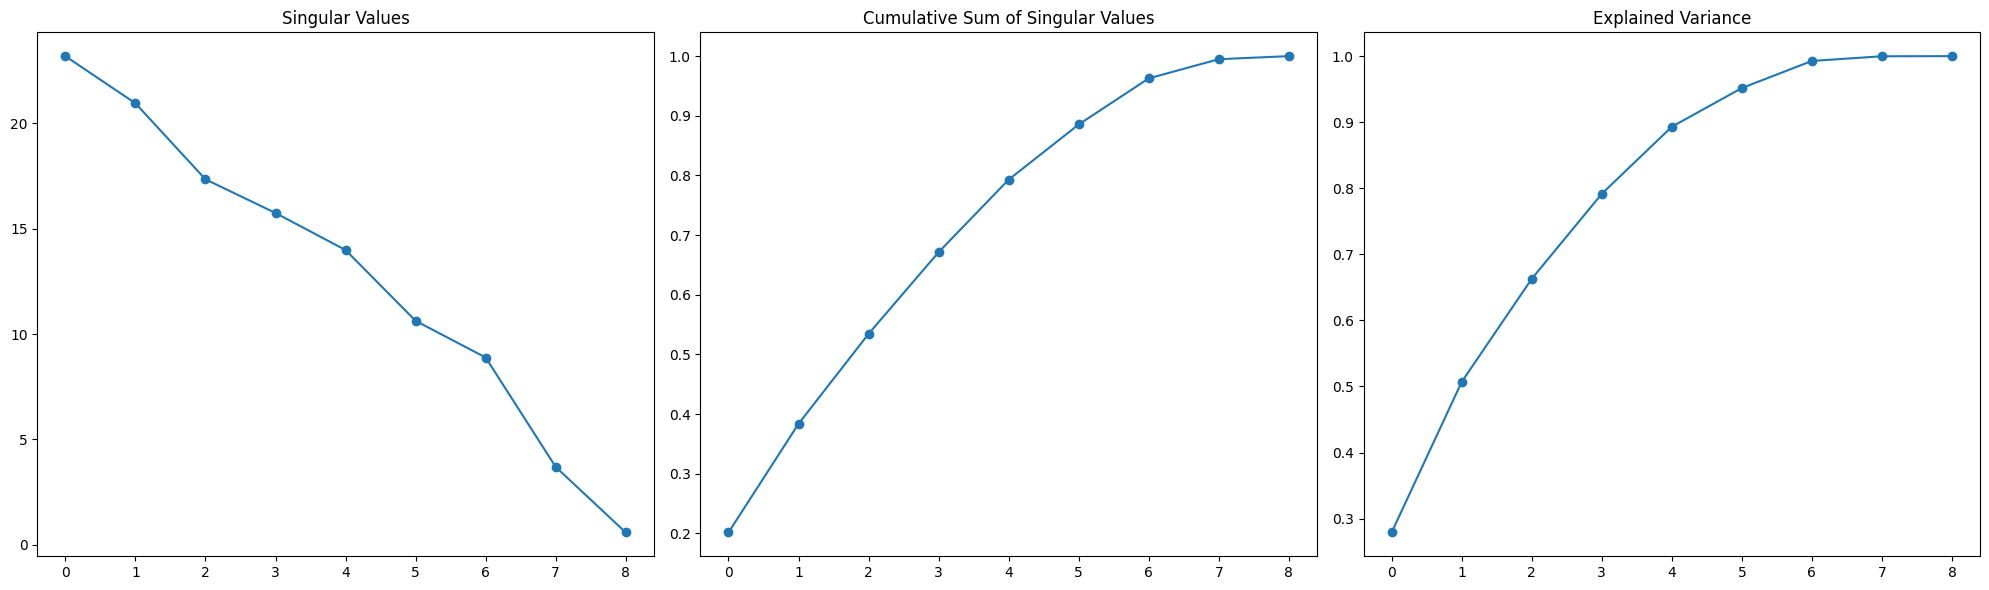

In [37]:
U, S, VT = np.linalg.svd(A_norm, full_matrices=False)

fig, ax, = plt.subplots(1, 3, figsize=(20, 6))

ax[0].plot(S, 'o-')
ax[0].set_title('Singular Values')

ax[1].plot(np.cumsum(S) / np.sum(S), 'o-')
ax[1].set_title('Cumulative Sum of Singular Values')

ax[2].plot(np.cumsum(S**2) / np.sum(S**2), 'o-')
ax[2].set_title('Explained Variance')

plt.tight_layout()
plt.show()

#### 4) Compute a matrix containing the principal components associated with the dataset.

In [40]:
pc_scores = np.matmul(U, np.diag(S))

pc_scores.shape, A_norm.shape

((214, 9), (214, 9))

#### 5) Generate a scatterplot of the first two principal components of the dataset, grouped by label

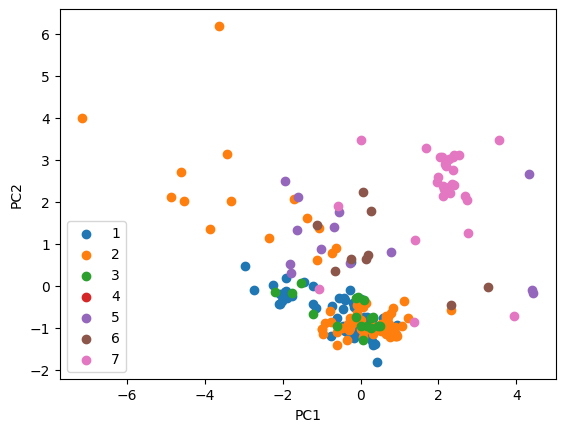

In [42]:
fig, ax = plt.subplots()

for k in nums_to_classes.keys():
    ax.scatter(
        pc_scores[data['Type'] == k, 0], 
        pc_scores[data['Type'] == k, 1], 
        label=k
    )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.legend()

plt.show()

#### 6) Consider now the first principal component. By looking at the components of the first principal direction, do you expect building windows float processed glasses to have a large or small concentration of magnesium and aluminum, respectively? And what about headlamps?

In [43]:
first_direction = VT[0, :]

mg_index = 2
al_index = 3

mg = first_direction[mg_index]
al = first_direction[al_index]

print(f'Mg: {mg:.4f}, Al: {al:.4f}')

Mg: -0.1109, Al: 0.4287


A negative value on the first principal direction for the Magnesium indicates that a high score on the principal component is a sign of low concentration of magnesium on that class, and viceversa. Conversely, a positive first principal direction for the Aluminium indicates that a high score on the PC is a sign of a high presence of Aluminium on that class and viceversa.

In [45]:
bwfp = pc_scores[:, 0][data['Type'] == 1].mean()
headlamps = pc_scores[:, 0][data['Type'] == 7].mean()

print(f'Building Windows Float Processed: {bwfp:.4f}')
print(f'Headlamps: {headlamps:.4f}')

Building Windows Float Processed: -0.4774
Headlamps: 2.0179


Following these values, we should expect a high concentration of Magnesium and a low concentration of Aluminium on the class 1, and the opposite for the class 7.

#### 7) Are your predictions confirmed by the original data?

Yes! Indeed:

In [47]:
mg_on_class1 = data_by_class[1]['Mg'].mean()
al_on_class1 = data_by_class[1]['Al'].mean()

print(f'Mg on class 1: {mg_on_class1:.4f}')
print(f'Al on class 1: {al_on_class1:.4f}')

print()

mg_on_class7 = data_by_class[7]['Mg'].mean()
al_on_class7 = data_by_class[7]['Al'].mean()

print(f'Mg on class 7: {mg_on_class7:.4f}')
print(f'Al on class 7: {al_on_class7:.4f}')


Mg on class 1: 3.5524
Al on class 1: 1.1639

Mg on class 7: 0.5383
Al on class 7: 2.1228


### Exercise 2

Consider the following function, where $\mathbf{x} = (x, y)$:

$$f(\mathbf{x}) = (x + 2y - 7)^2 + (2x + y - 5)^2$$

#### 1) Plot the function:

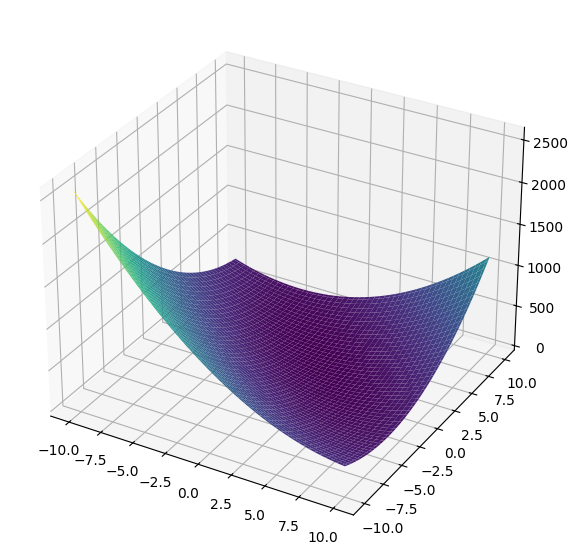

In [50]:
f = lambda x: (x[0] + 2 * x[1] - 7)**2 + (2 * x[0] + x[1] - 5)**2

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)

Z = f([X, Y])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

#### 2) Compute analitically the value $\mathbf{x}_{\min}$ where the function attains its minimum value and $f(\mathbf{x}_{\min})$

**Answer:**

Note that we have a convex function, so it is enough to set the gradient of the function equal to 0 to compute the minimum.

$$\nabla f = (10x + 8 y - 34, 8 x + 10y - 38)$$

$$\nabla f = 0$$
$$\iff x = 1, \quad y = 3$$

Indeed:

In [70]:
A = np.array([
    [10, 8],
    [8, 10]
])

b = np.array([34, 38])

x = np.linalg.solve(A, b)

print(f'x: {x}')

print(f'f(x): {f(x)}')

x: [1. 3.]
f(x): 0.0


#### 3) Implement the GD method. Use the stop criterium as  

In [72]:
from jax import grad


def GD(
    f, x0, lr=0.01, max_iter=200, tol=1e-6
):
    x = x0
    prev_x = x0

    x_list = [x0]

    grad_f = grad(f)
    for i in range(max_iter):
        x = x - lr * grad_f(x)
        x_list.append(x)

        if np.abs(f(x) - f(prev_x)) < tol:
            break
        prev_x = x
        
    return x, x_list


#### 4) Apply the GD method with $\epsilon = 10^{-3}$, $\alpha = 0.01$ and $0.1$. Plot the convergence history and comment the results.

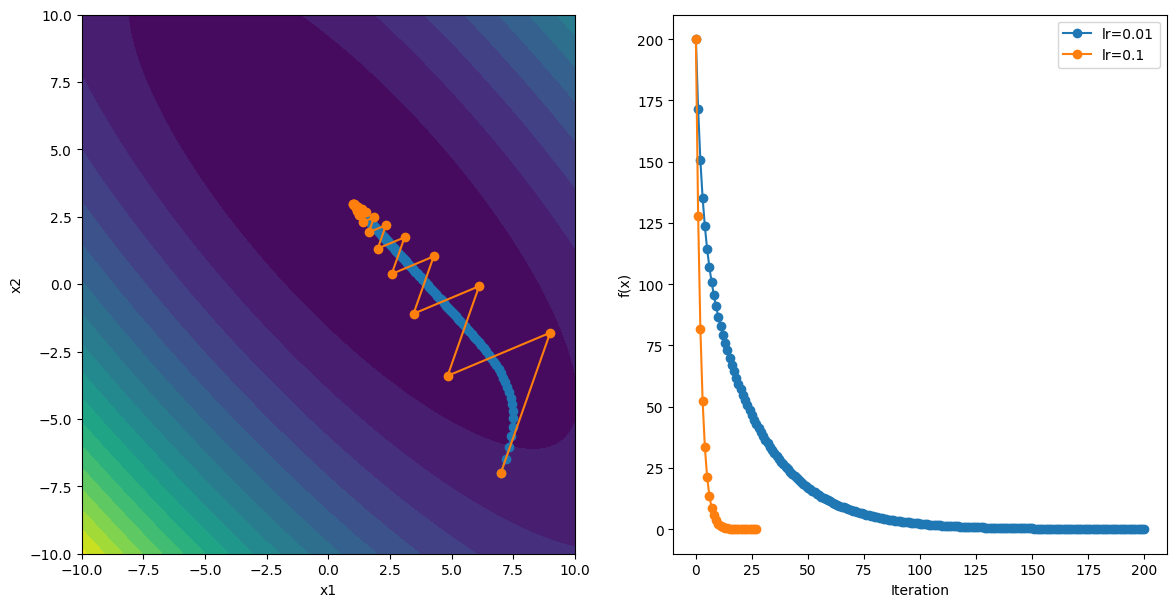

In [92]:
lrs = [0.01, 0.1]
tol = 1e-3

x0 = np.array([7, -7], dtype=np.float32)

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

for lr in lrs:
    x, x_list = GD(f, x0, lr=lr, tol=tol)

    x_list = np.array(x_list)

    ax[0].plot(x_list[:, 0], x_list[:, 1], 'o-', label=f'lr={lr}')
    ax[1].plot(np.arange(x_list.shape[0]), [f(x) for x in x_list], 'o-', label=f'lr={lr}')


ax[0].contourf(X, Y, Z, levels=20)

ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')

ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('f(x)')

plt.legend()
plt.show()


We observe that both experiments converge to the minimum. The gradient descent with a greater learning rate converges faster, and shows a significant zigzagging behavior, while the smaller LR converges much slower, and shows a more stable behavior, advancing in small steps. This is expected, but we should notice that a greater LR doesn't always imply a faster convergence. If we choose a LR too high, the slgorithm may never converge.

#### 5) Implement the GD with momentum (GDM), i.e.

In [95]:
def GD_mom(
    f, x0, lr=0.01, mom=0.9, max_iter=200, tol=1e-6
):
    grad_f = grad(f)

    x = x0
    prev_x = x0

    z = np.zeros_like(x0)

    x_list = [x0]

    for _ in range(max_iter):
        z = mom * z +  grad_f(x)
        x = x - lr * z

        x_list.append(x)

        if np.abs(f(x) - f(prev_x)) < tol:
            break

        prev_x = x

    return x, np.array(x_list)

#### 6) Apply the GDM method with $\epsilon = 10^{-3}$, $\alpha = 0.01, 0.1$ and $\beta = 0.5, 0.9$. Plot the convergence history and comment the results

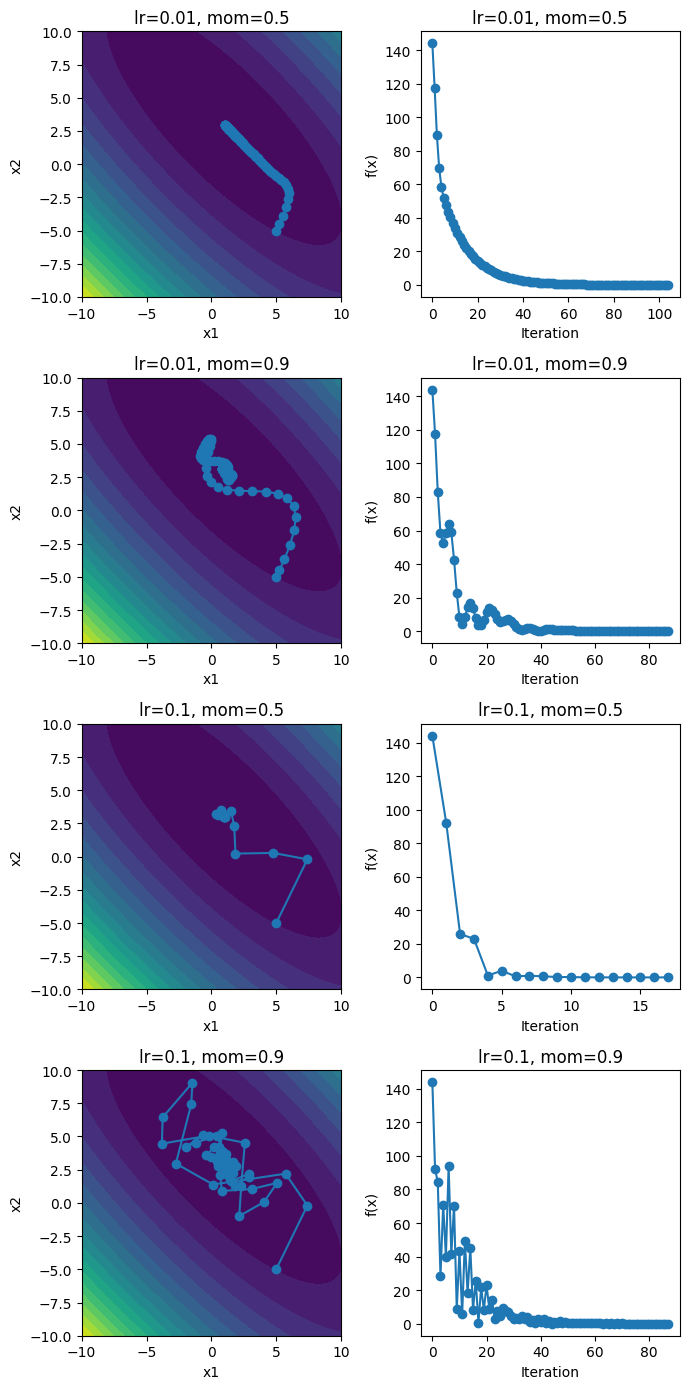

In [103]:
lrs = [0.01, 0.1]
moms = [0.5, 0.9]
tol = 1e-3

x0 = np.array([5, -5], dtype=np.float32)

fig, ax = plt.subplots(4, 2, figsize=(7, 14))

for i, lr in enumerate(lrs):
    for j, mom in enumerate(moms):
        fig_ind = i * 2 + j

        x, x_list = GD_mom(f, x0, lr=lr, mom=mom, tol=tol)

        ax[fig_ind, 0].plot(x_list[:, 0], x_list[:, 1], 'o-', label=f'mom={mom}')
        ax[fig_ind, 1].plot(np.arange(x_list.shape[0]), [f(x) for x in x_list], 'o-', label=f'mom={mom}')

        ax[fig_ind, 0].contourf(X, Y, Z, levels=20)
        ax[fig_ind, 0].set_xlabel('x1')
        ax[fig_ind, 0].set_ylabel('x2')
        ax[fig_ind, 0].set_title(f'lr={lr}, mom={mom}')

        ax[fig_ind, 1].set_xlabel('Iteration')
        ax[fig_ind, 1].set_ylabel('f(x)')
        ax[fig_ind, 1].set_title(f'lr={lr}, mom={mom}')


plt.tight_layout()
plt.show()

Notice that, with a high learning rate, if we set also a high coefficient for momentum, we seem to get a chaotic behavior, moving erratically around the minimum before converging. With a low LR and momentum, we have a steady behavior, approaching by small steps to the minimum. but we also notice that the algorithm takes too long to converge. 

When trying with a higher momentum while low LR, we converge a little faster that the previous case, and by looking at the movement of each iteration, we see that the algorithm revolves around the minimum before converging. It is not as chaotic as the first case, but still causes a long converging time. Finally, with a high LR but a low momentum, we reach the best performance, with the algorithm converging very quickly. This is because, for the starting point and function shape, it is better to move in bigger steps while retaining some of the previous gradients (but not too much to avoid surpassing the ideal value). We have to be careful, as these values are not always the best ones, as the performance depends of the function shape and the starting point.

### Exercise 3

Consider the two classes of patterns that are shown in the following figure where Class I represents vertical lines and Class II represents horizontal lines. 

<div align="center">
    <img src="ex3.png" alt="image.png">
</div>

#### 1) Are these categories linearly separable?

**Answer:**

It depends on how we represent each class on a real vector space. If we, for example, convert each line to a vector with 2 coordinates, each representing the index of the colored squares (1, 2, 3 or 4), then it is clearly separable. Indeed:

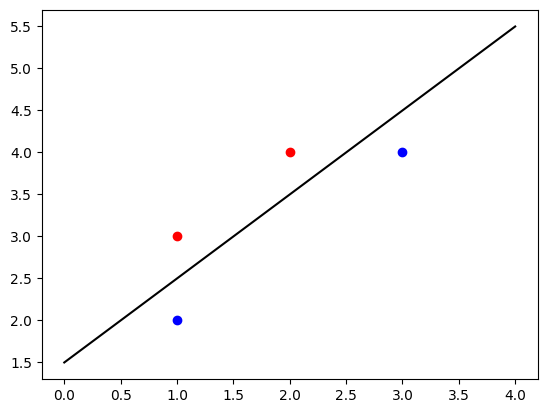

In [140]:
X = np.array([
    [1, 3],
    [2, 4],
    [1, 2],
    [3, 4]
])

y = np.array([1, 1, 0, 0])

fig, ax = plt.subplots()

w = np.array([-1, 1])
b = -1.5

space = np.linspace(0, 4, 100)

line = -w[0] / w[1] * space - b / w[1]

for i in range(X.shape[0]):
    ax.plot(X[i, 0], X[i, 1], 'o', color='red' if y[i] == 1 else 'blue')

ax.plot(space, line, color='black')

plt.show()

If we represent them in the naive form, as a vector with 4 dimensions, it is more difficult to see if the set is linearl separable. We can use a logistic regression to determine that:

In [143]:
from sklearn.linear_model import LogisticRegression


X_naive = np.array([
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 1, 0, 0],
    [0, 0, 1, 1]
])


model = LogisticRegression()
model.fit(X_naive, y)

print(f'w: {model.coef_}')
print(f'b: {model.intercept_}')

# Check the accuracy
y_pred = model.predict(X_naive)
accuracy = np.mean(y_pred == y)

print(f'Accuracy: {accuracy}')


w: [[0. 0. 0. 0.]]
b: [0.]
Accuracy: 0.5


As we are not getting full accuracy on the model, it means that in this case, the classes are not linearly separable.

#### 2) Design a multilayer network to distinguish these categories